# seaborn介绍
+ 在matplotlib的基础上进行了更高级的API封装
+ 作图更加方便，画出来的图更加美观
+ 高度兼容numpy和pandas数据结构
+ 可视化变量之间的关系


# 安装seaborn
打开Anaconda命令行，运行
```bash
conda install seaborn
```
或者
```bash
pip install seaborn -i https://mirrors.aliyun.com/pypi/simple/
```

In [50]:
# 调整图像显示大小
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0)

In [51]:
import seaborn as sns


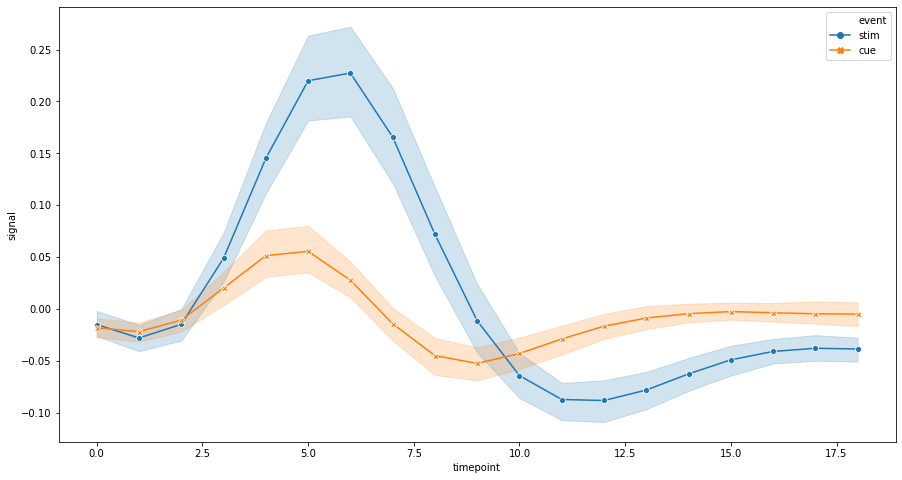

In [36]:
# 折线图
fmri = pd.read_csv('seaborn-data/fmri.csv')
#ax = sns.lineplot(x="timepoint", y="signal", data=fmri)
ax = sns.lineplot(x="timepoint", y="signal",hue="event", style="event", markers=True, dashes=False, data=fmri)


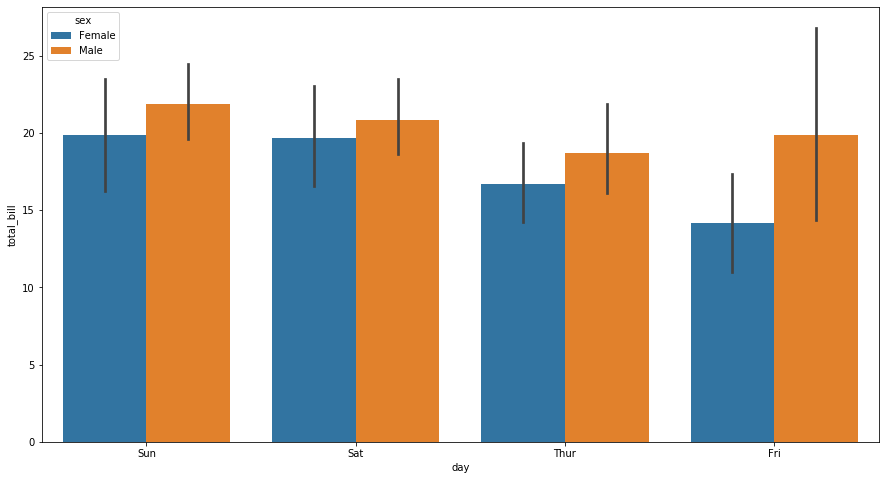

In [37]:
# 柱状图
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

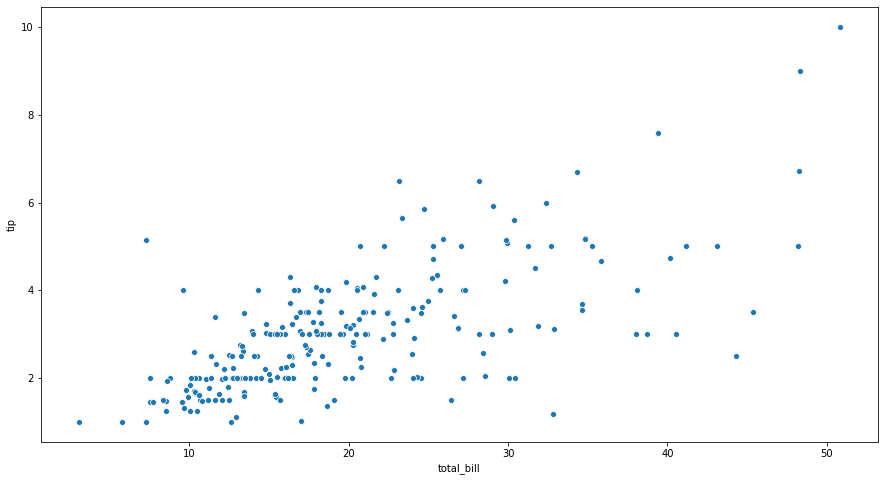

In [38]:
# 散点图
import pandas as pd
tips = pd.read_csv('seaborn-data/tips.csv')
ax = sns.scatterplot(x="total_bill", y="tip", data=tips)
#ax = sns.scatterplot(x="total_bill", y="tip",hue="day", style="time",size='size',data=tips)


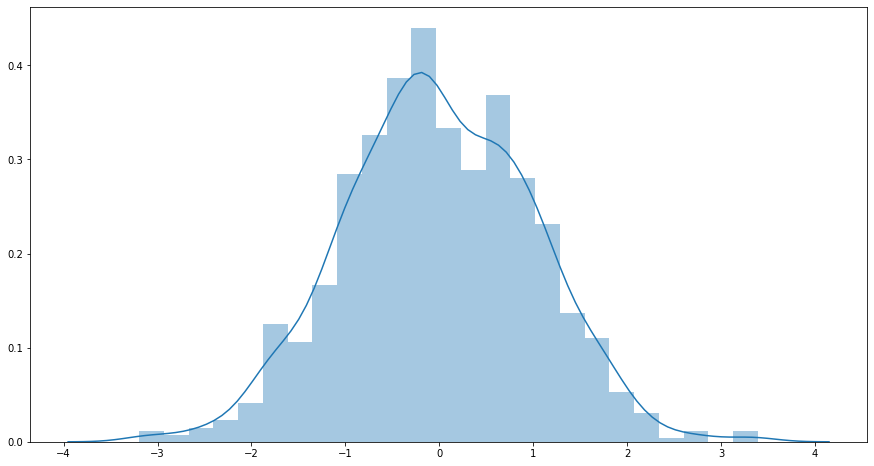

In [39]:
# 直方图
import numpy as np
np.random.seed(666)
x = np.random.randn(1000)
ax = sns.distplot(x)
#ax = sns.distplot(x, bins=100,hist=True, kde=True, rug=True, axlabel='norm')


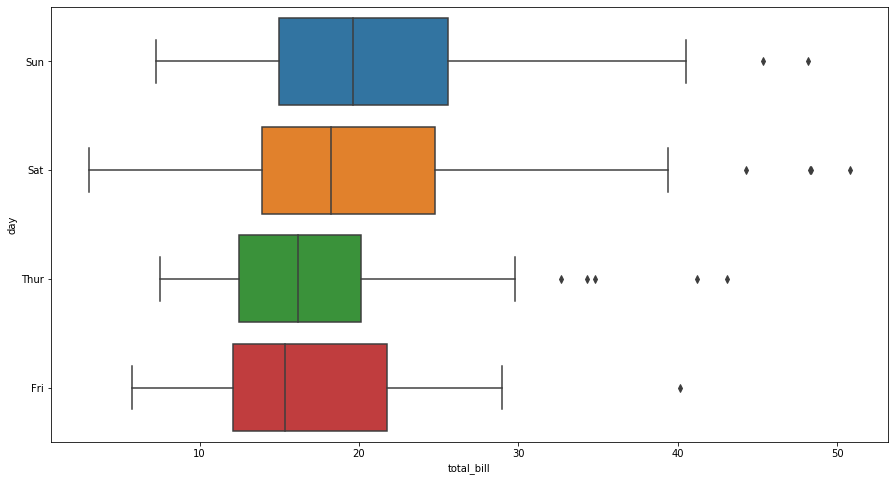

In [40]:
# 箱线图
ax = sns.boxplot(x="total_bill", y="day", orient='h', data=tips)

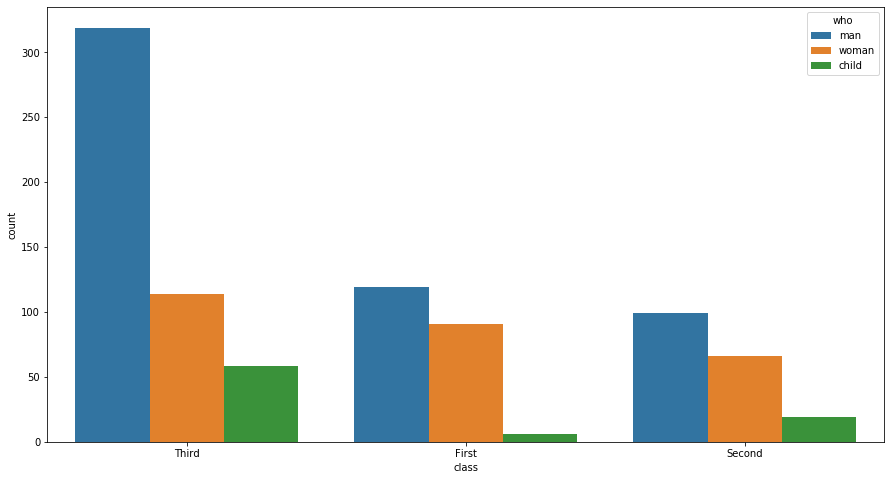

In [41]:
# 计数图
titanic = pd.read_csv('seaborn-data/titanic.csv')
ax = sns.countplot(x="class", hue="who", data=titanic)


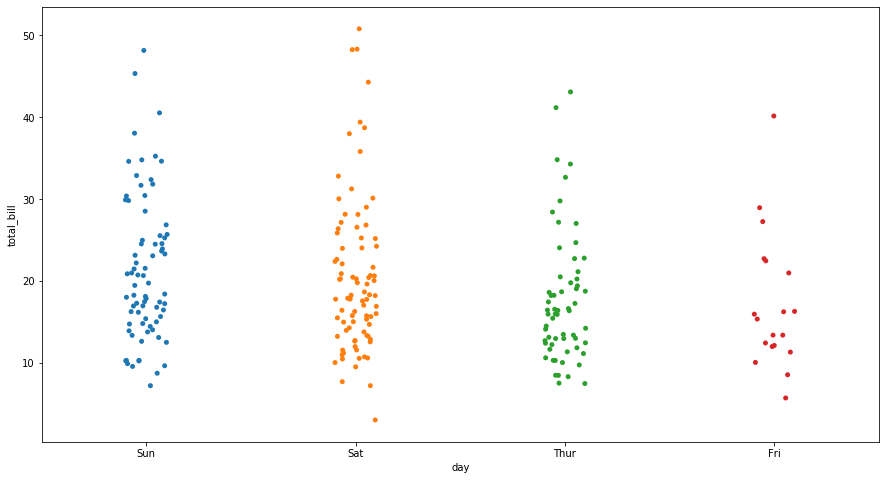

In [42]:
# 分类图
ax = sns.stripplot(x="day", y="total_bill", data=tips)
#ax = sns.stripplot(x="day", y="total_bill", hue="smoker",data=tips,dodge=True)


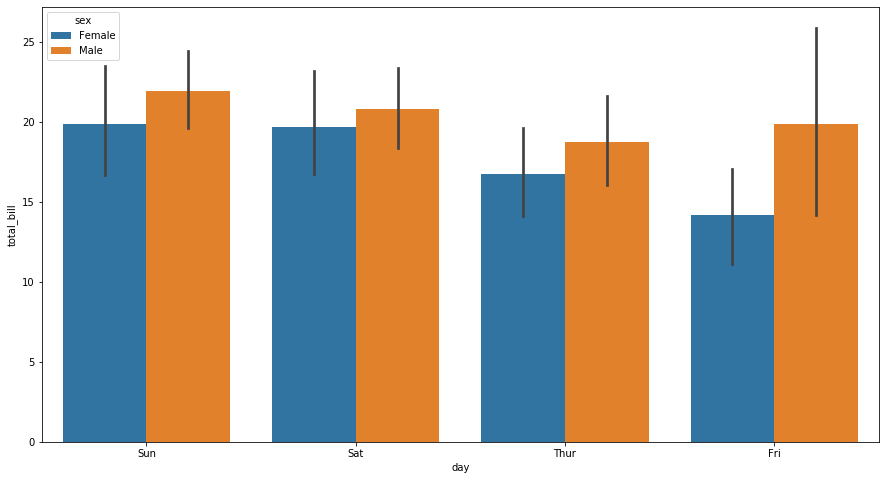

In [43]:
# 柱状图
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)


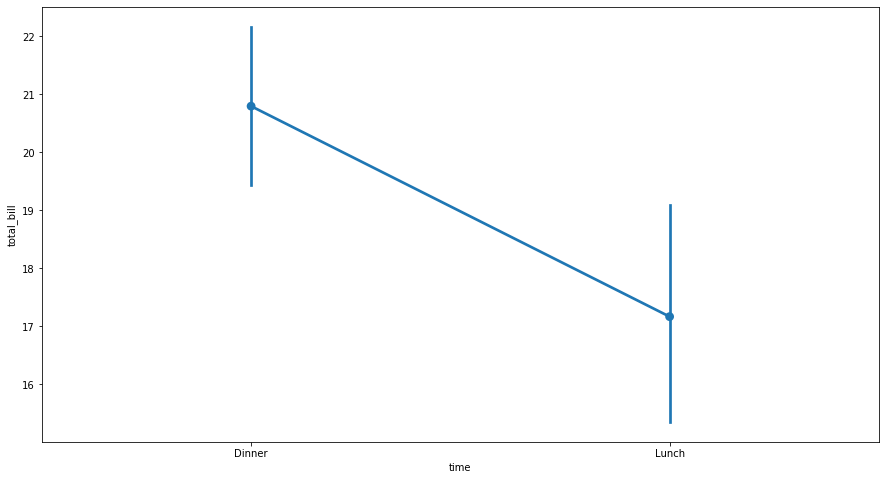

In [44]:
# 点图
ax = sns.pointplot(x="time", y="total_bill", data=tips)

#ax = sns.pointplot(x="time", y="total_bill", hue="smoker", data=tips, dodge=True)


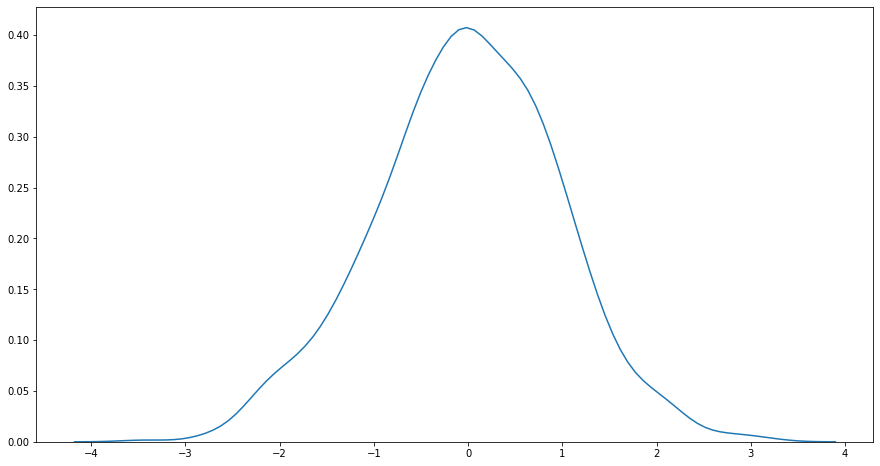

In [45]:
# 核密度估计图
x = np.random.randn(1000)
ax = sns.kdeplot(x)


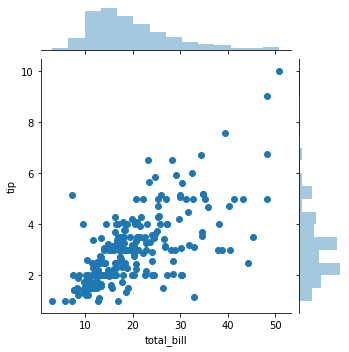

In [46]:
# 联合分布图
g = sns.jointplot(x="total_bill", y="tip", data=tips, height=5)
#g = sns.jointplot(x="total_bill", y="tip", data=tips, kind='kde', height=5)


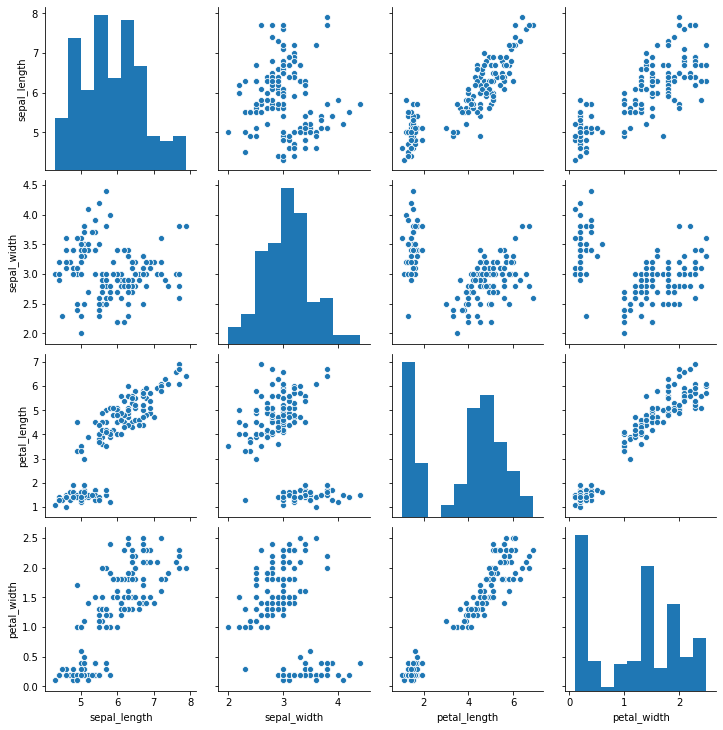

In [47]:
# 变量关系组图
iris = pd.read_csv('seaborn-data/iris.csv')
g = sns.pairplot(iris)

#g = sns.pairplot(iris, hue="species", markers=["o", "s", "D"])


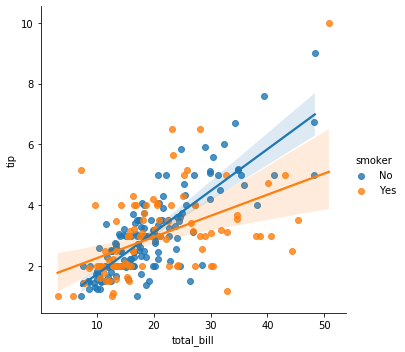

In [48]:
# 线性回归图
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

#g = sns.lmplot(x="total_bill", y="tip", col="day", hue="day",data=tips, col_wrap=2, height=4)


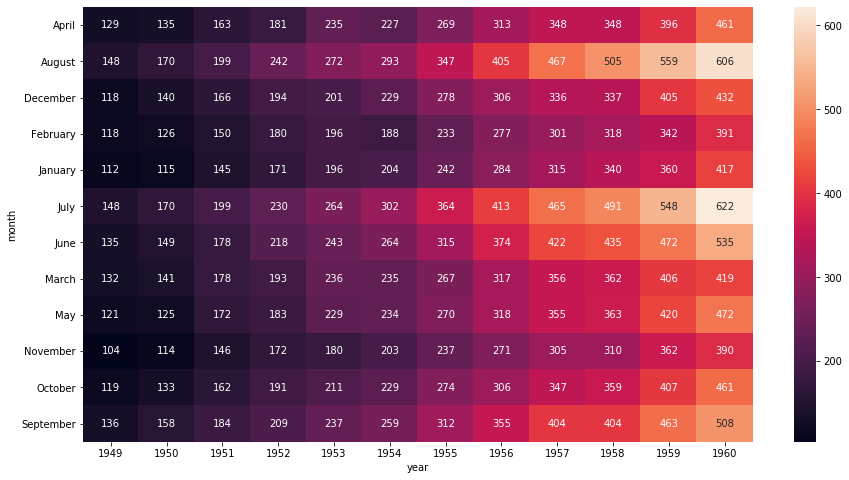

In [49]:
# 热力图
flight = pd.read_csv('seaborn-data/flights.csv')
flights = flight.pivot('month','year','passengers')
sns.heatmap(flights, annot=True, fmt='d')


# 实战项目 - 见PPT

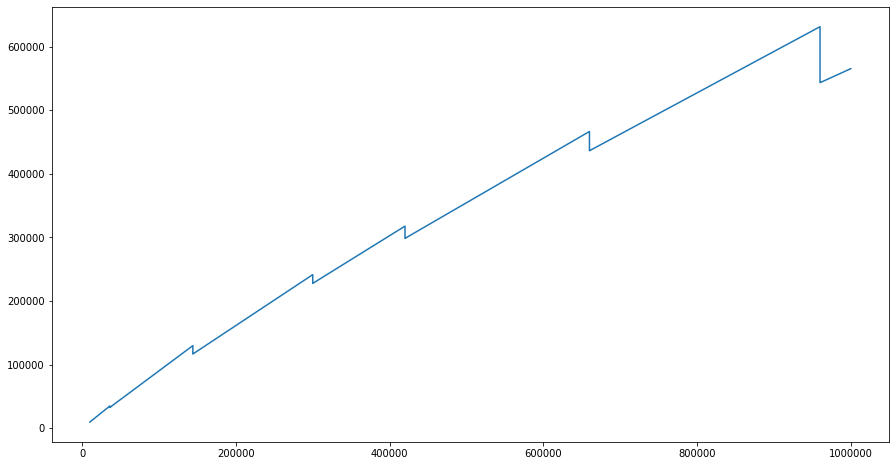

In [53]:
import numpy as np
import seaborn as sns 

# 计算年终奖个税的函数
def bonus_tax(bonus):
    if bonus <= 36000:
        return bonus * 0.03
    elif bonus <= 144000:
        return bonus * 0.1 - 210
    elif bonus <= 300000:
        return bonus * 0.2 - 1410
    elif bonus <= 420000:
        return bonus * 0.25 - 2660
    elif bonus <= 660000:
        return bonus * 0.3 - 4410
    elif bonus <= 960000:
        return bonus * 0.35 - 7160
    else:
        return bonus * 0.45 - 15160
    
bonuses = range(10000, 1000000, 1)
taxes = []
net_incomes = []
for bonus in bonuses:
    tax = bonus_tax(bonus)
    taxes.append(tax)
    net_incomes.append(bonus-tax)

sns.lineplot(x=bonuses, y=net_incomes)